In [ ]:
#read csv file
import pandas as pd
data=pd.read_csv("/content/16_air_quality_prediction.csv")
print(data)

            date  location  pm2.5   pm10  temperature  predicted_aqi
0     2023-01-01  Istanbul  29.05  58.73         15.4          40.71
1     2023-01-01    Ankara  24.74  83.86         26.4          50.63
2     2023-01-01     Izmir  23.90  76.91         27.8          39.67
3     2023-01-01     Bursa  43.67  49.58         30.6          36.50
4     2023-01-02  Istanbul  28.40  76.31         23.9          46.89
...          ...       ...    ...    ...          ...            ...
1455  2023-12-30     Bursa  32.45  92.85         19.0          54.18
1456  2023-12-31  Istanbul  35.23  63.02         23.2          46.39
1457  2023-12-31    Ankara  45.30  47.77          8.4          44.05
1458  2023-12-31     Izmir  37.29  64.74         30.9          52.19
1459  2023-12-31     Bursa  20.38  89.41         26.1          36.89

[1460 rows x 6 columns]


In [ ]:
# print null values
print(data.isnull())

       date  location  pm2.5   pm10  temperature  predicted_aqi
0     False     False  False  False        False          False
1     False     False  False  False        False          False
2     False     False  False  False        False          False
3     False     False  False  False        False          False
4     False     False  False  False        False          False
...     ...       ...    ...    ...          ...            ...
1455  False     False  False  False        False          False
1456  False     False  False  False        False          False
1457  False     False  False  False        False          False
1458  False     False  False  False        False          False
1459  False     False  False  False        False          False

[1460 rows x 6 columns]


In [ ]:
#Encodes location
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])

print(data[['location', 'location_encoded']].head())
print(data[['location', 'location_encoded']].tail())

   location  location_encoded
0  Istanbul                 2
1    Ankara                 0
2     Izmir                 3
3     Bursa                 1
4  Istanbul                 2
      location  location_encoded
1455     Bursa                 1
1456  Istanbul                 2
1457    Ankara                 0
1458     Izmir                 3
1459     Bursa                 1


In [ ]:
#Extracts date features year, month, day, weekday.
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday

print(data[['date', 'year', 'month', 'day', 'weekday']].head())
print(data[['date', 'year', 'month', 'day', 'weekday']].tail())

        date  year  month  day  weekday
0 2023-01-01  2023      1    1        6
1 2023-01-01  2023      1    1        6
2 2023-01-01  2023      1    1        6
3 2023-01-01  2023      1    1        6
4 2023-01-02  2023      1    2        0
           date  year  month  day  weekday
1455 2023-12-30  2023     12   30        5
1456 2023-12-31  2023     12   31        6
1457 2023-12-31  2023     12   31        6
1458 2023-12-31  2023     12   31        6
1459 2023-12-31  2023     12   31        6


In [ ]:

from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['pm2.5', 'pm10', 'temperature', 'location_encoded', 'year', 'month', 'day', 'weekday']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features (X) and target (y)
X = data[numerical_features]
y = data['predicted_aqi']

print("Scaled features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Scaled features (X):
      pm2.5      pm10  temperature  location_encoded  year     month  \
0 -0.597105 -0.563904    -0.522067          0.447214   0.0 -1.602745   
1 -1.024671  0.714391     0.724553         -1.341641   0.0 -1.602745   
2 -1.108002  0.360863     0.883214          1.341641   0.0 -1.602745   
3  0.853248 -1.029339     1.200535         -0.447214   0.0 -1.602745   
4 -0.661587  0.330343     0.441230          0.447214   0.0 -1.602745   

        day   weekday  
0 -1.673503  1.493348  
1 -1.673503  1.493348  
2 -1.673503  1.493348  
3 -1.673503  1.493348  
4 -1.559818 -1.501553  

Target variable (y):
0    40.71
1    50.63
2    39.67
3    36.50
4    46.89
Name: predicted_aqi, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
numerical_features = ['pm2.5', 'pm10', 'temperature', 'location_encoded', 'year', 'month', 'day', 'weekday']
X = data[numerical_features]
y = data['predicted_aqi']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 25.81859490541197
R-squared: 0.7103996563709472


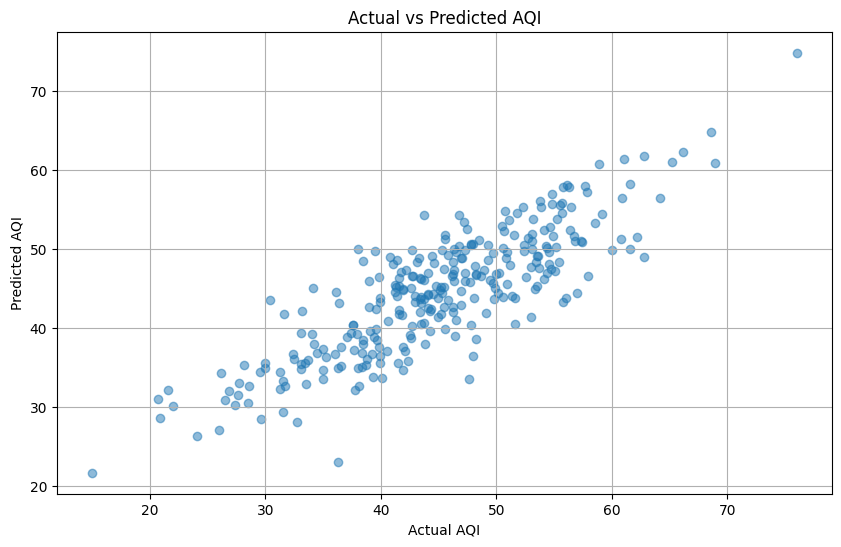

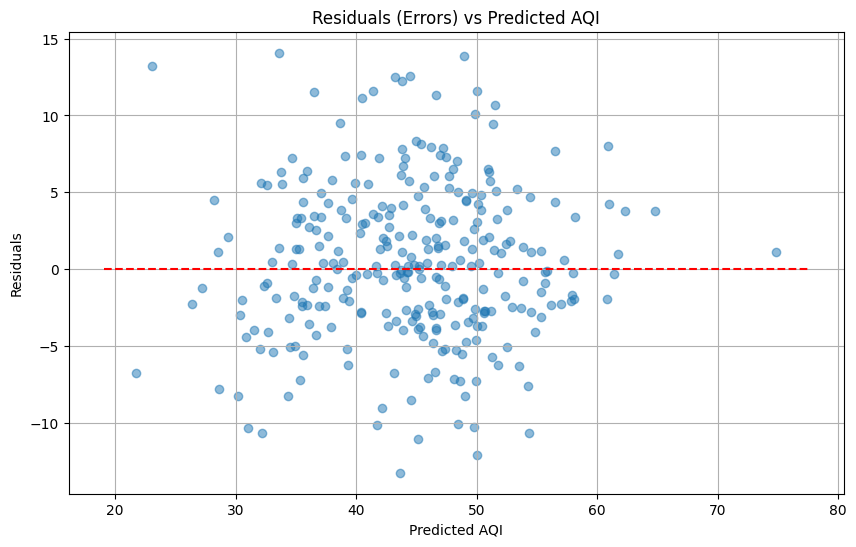

In [19]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residuals (Errors) vs Predicted AQI")
plt.hlines(0, plt.xlim()[0], plt.xlim()[1], color='red', linestyle='--')
plt.grid(True)
plt.show()